# Project 1: Student Performance

## Introduction:


**Author**: Purinat33

**Dataset**: https://archive.ics.uci.edu/dataset/320/student+performance

## Objective:

The goal is to predict the performance of a given student (in 3 grades) either in terms of:
* Regression (Where we predict the number directly)
* Classification (Where we bin the scores into different "Grades" and attempt to predict what class of grade)

For this task we will be using regression directly.

## Code

### Dataset Loading

In [610]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [611]:
df = pd.read_csv('data/student-mat.csv')
df

,school;sex;age;address;famsize;Pstatus;Medu;Fedu;Mjob;Fjob;reason;guardian;traveltime;studytime;failures;schoolsup;famsup;paid;activities;nursery;higher;internet;romantic;famrel;freetime;goout;Dalc;Walc;health;absences;G1;G2;G3
0,"GP;""F"";18;""U"";""GT3"";""A"";4;4;""at_home"";""teacher..."
1,"GP;""F"";17;""U"";""GT3"";""T"";1;1;""at_home"";""other"";..."
2,"GP;""F"";15;""U"";""LE3"";""T"";1;1;""at_home"";""other"";..."
3,"GP;""F"";15;""U"";""GT3"";""T"";4;2;""health"";""services..."
4,"GP;""F"";16;""U"";""GT3"";""T"";3;3;""other"";""other"";""h..."
...,...
390,"MS;""M"";20;""U"";""LE3"";""A"";2;2;""services"";""servic..."
391,"MS;""M"";17;""U"";""LE3"";""T"";3;1;""services"";""servic..."
392,"MS;""M"";21;""R"";""GT3"";""T"";1;1;""other"";""other"";""c..."
393,"MS;""M"";18;""R"";""LE3"";""T"";3;2;""services"";""other""..."


The dataset is `;` separated instead of comma separated. So we need to re-process it to contain `,`.

In [612]:
infile = 'data/student-mat.csv'
outfile = 'data/performance.csv'

with open(infile, 'r') as f:
    data = f.read()
    
data = data.replace(';',',')

with open(outfile, 'w') as wf:
    wf.write(data)

In [613]:
df = pd.read_csv('data/performance.csv')
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


Only G3 (Final Grade) should be predicted. Both G1 and G2 are parts of the training data

### Dataset Inspection



#### Column Count

We want to make sure that categorical columns, like `Gender` doesn't contain typo or other errors.

In [614]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

No null/empty data, moving on to each column

#### Column Frequency

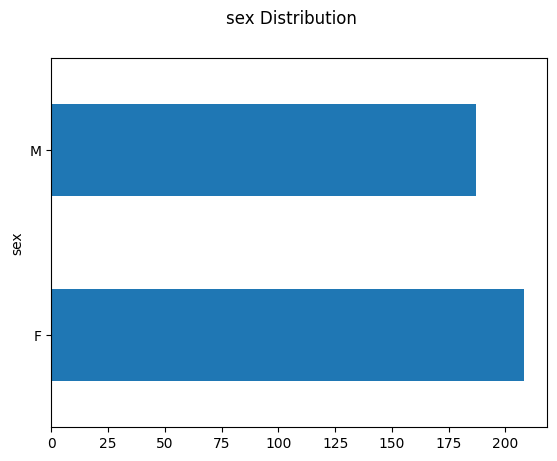

In [615]:
# Plotting the frequency of each value separated by gender
# https://stackoverflow.com/questions/50158081/how-to-create-overlay-bar-plot-in-pandas
fig, ax = plt.subplots()
df["sex"].value_counts().plot(kind='barh')
fig.suptitle("sex Distribution")

plt.show()

In [616]:

# Plotting the frequency of each value separated by gender
# https://stackoverflow.com/questions/50158081/how-to-create-overlay-bar-plot-in-pandas

# Exclude Gender column
cols = [c for c in df.columns if c != 'sex']

# Create a figure with enough subplots
n = len(cols)
fig, axes = plt.subplots(nrows=n, ncols=1, figsize=(10, 4*n))

# If only one column, axes is not iterable, so wrap it
if n == 1:
    axes = [axes]

for ax, column in zip(axes, cols):
    # Male bars
    df.loc[df['sex'] == 'M', column].value_counts().plot(
        kind='barh', ax=ax, color='cyan', alpha=0.6, label='Male')

    # Female bars
    df.loc[df['sex'] == 'F', column].value_counts().plot(
        kind='barh', ax=ax, color='pink', alpha=0.6, label='Female')

    ax.set_title(f"{column} Distribution by Gender")
    ax.legend()

fig.tight_layout()
plt.savefig('out/graph.jpg') # Big plot, just gonna save it as a separate file
plt.close('all')

### Preprocessing

#### Generate `X` (features) and `y` (target)

In [617]:
# Splitting into X and y arrays
X = df.iloc[:, 0:-1]
y = df.iloc[:, -1]

Now that we have inspected the original data and found no irregularity like missing values, we can now start preprocessing for the machine learning process by:

1. Splitting: Splitting the `X` and `y` data into training and testing set
2. Encoding: Turning categorical data (e.g. `M`) into numerical data
    * Feature: `OneHotEncoder`

In [618]:
# Print out the columns that are categorical (Need encoding)
col_to_encode = df.select_dtypes(include=['object']).columns.tolist()
num_cols = df.select_dtypes(exclude=['object']).columns.tolist()
col_to_encode

['school',
 'sex',
 'address',
 'famsize',
 'Pstatus',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic']

In [619]:
cat_cols_raw = X.select_dtypes(include=["object","category","bool"]).columns.tolist()
num_cols_all = X.select_dtypes(include=["number"]).columns.tolist()

# Split numeric into binary vs. real-valued (threshold = 2 unique values)
num_binary = [c for c in num_cols_all if X[c].nunique(dropna=False) == 2]
num_real   = [c for c in num_cols_all if X[c].nunique(dropna=False) > 2]

print("Categorical columns:", cat_cols_raw)
print("Numeric (binary)   :", num_binary)
print("Numeric (real)     :", num_real)

Categorical columns: ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
Numeric (binary)   : []
Numeric (real)     : ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2']


In [620]:
# The numerical data still aren't here
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=42)

# 1) Build preprocessor with scaling OFF for numeric-real (passthrough)
pre = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols_raw),
        ("num_real", "passthrough", num_real),    # <-- off for now
        ("num_bin", "passthrough", num_binary),
    ],
    remainder="drop",
    verbose_feature_names_out=True
)

X_train_encoded = pre.fit_transform(X_train)
X_test_encoded  = pre.transform(X_test)

### Component Reduction (For Visualization)

The shape of our data:

In [621]:
print(X_train_encoded.shape)

(276, 58)


To plot the 58 features of all performance score is basically impossible. So we used a technique called **PCA** to create only 2 new features which can be used for plotting the relationship and distinction between the target classes

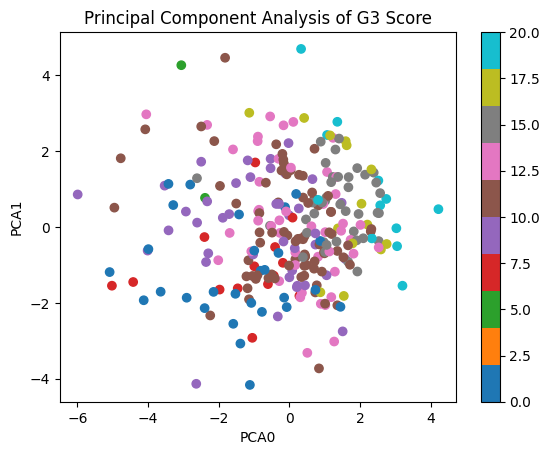

In [622]:
from sklearn.decomposition import PCA
pre.set_params(num_real=StandardScaler(with_mean=False))  # toggle on

X_train_p = pre.fit_transform(X_train)

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_train_p)
data = plt.scatter(X_pca[:,0], X_pca[:,1], c=y_train[:], cmap='tab10')

plt.title("Principal Component Analysis of G3 Score")
plt.xlabel("PCA0")
plt.colorbar()
plt.ylabel("PCA1")
plt.show()

The plot shows that the scores overlap, meaning that two features cannot describe G3 distribution with details.

#### Using a different technique to reduce the dimensionality of the data

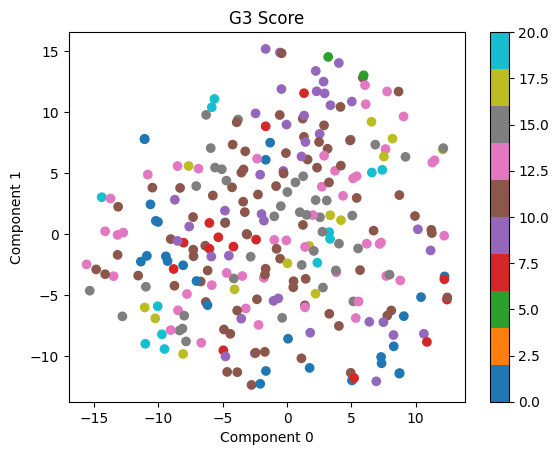

In [623]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, init='random', learning_rate='auto', random_state=42)
X_tsne = tsne.fit_transform(X_train_p)
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1],
                      c=y_train, cmap='tab10')
 

plt.title("G3 Score")
plt.xlabel("Component 0")
plt.ylabel("Component 1")
plt.colorbar()
plt.show()

In conclusion: Low-dimensional visualizations, through PCA or t-SNE, do not show clear scores separation; model performance likely relies on higher-dimensional interactions.

Read more on: www.link

### Clustering

Visualizing classes separation through a clustering unsupervised learning algorithm

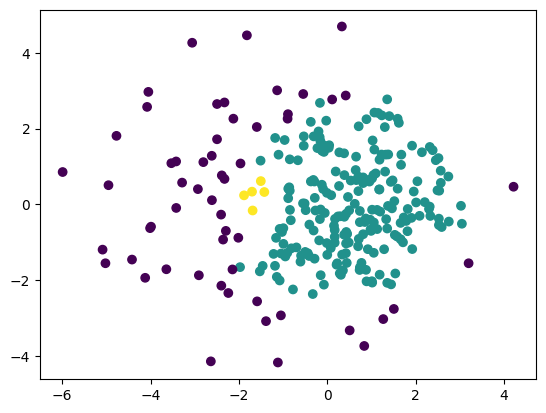

In [624]:
from sklearn.cluster import DBSCAN
pre.set_params(num_real="passthrough")

# https://www.askpython.com/python/examples/plot-k-means-clusters-python
# PCA is only for plotting the scale in 2D, the algorithm still takes in the full features
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_train_p)

dbscan = DBSCAN()
labels = dbscan.fit_predict(X_pca)

plt.scatter(X_pca[:,0], X_pca[:,1], c=labels)
# plt.scatter(kmean.cluster_centers_[:, 0], kmean.cluster_centers_[:, 1], c='red', label='Cluster Center')
plt.show()


Using unsupervised algorithm like DBSCAN, the G3 scores can be clustered into distinct groups, which would likely behave the same as if we group the scores into a Grade class. We can see some sort of outliers in the clusters.

### Simple Machine Learning 

Now that we got the ideas of what the data is like, we can start making prediction by building a machine learning model.

#### Goal:

For simplicity sake, we want the model with the best accuracy.

In regression problems, accuracy (how much the prediction differs from the actual label) can either use R-Squared or MAE. We want to approximate the best of both worlds for our model.

##### Metrics:

**R<sup>2</sup>** metrics (from `score` method) is similar to accuracy:
* The lower the value, the worse it is at prediction, in a nutshell.

**MSE**: The smaller the value, the better it is.

**RMSE**: On average, how far off the predictions are.

**MAE**: Gives us the average size of prediction errors in plain units of the target. 
* It’s often easier to explain to non-technical people (“we’re off by about 2.5 points on average” for MAE = 2.5).

#### Dummy Classifier

Serves as a simple baseline to compare against other more complex classifiers.

In [625]:
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import cross_val_score

model = DummyRegressor(strategy='mean')
model.fit(X_train_encoded, y_train)
y_pred = model.predict(X_train_encoded)
print(
    f"Training R2 Score: {(cross_val_score(model, X_train_encoded, y_train, cv=5).mean()).round(3)}")
print(
    f"Training MAE Score: {-(cross_val_score(model, X_train_encoded, y_train, cv=5, scoring='neg_mean_absolute_error').mean()).round(3)}")

Training R2 Score: -0.009
Training MAE Score: 3.32


We can interpret this as: "If the model always pick the average (mean) G3 score as prediction? How bad will it perform?"

For this case it is worse than just picking the mean G3.

#### Linear Models

Starting simple, we choose a linear model: Logistic Regression, which despite the name, is a classification algorithm.

The model works by finding coefficients to each feature.

In [626]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

comparison = {}

model = LinearRegression()
model.fit(X_train_encoded, y_train)

r2 = (cross_val_score(model, X_train_encoded, y_train, cv=6).mean()).round(3)
mae = -(cross_val_score(model, X_train_encoded, y_train, cv=5, scoring='neg_mean_absolute_error').mean()).round(3)

print(
    f"Training R2 Score: {r2}")
print(
    f"Training MAE Score: {mae}")

comparison["linear_regression"] = {"R2": r2, "MAE": mae}

y_pred = model.predict(X_train_encoded)

Training R2 Score: 0.814
Training MAE Score: 1.381


The performance is better than the baseline. We can inspect more by plotting prediction vs. actual value:

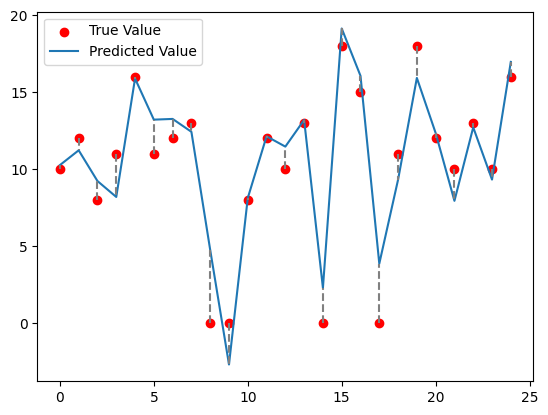

In [627]:
plt.figure()
idx = np.arange(25)

y_true_25 = y_train.iloc[:25].values
y_pred_25 = y_pred[:25]

plt.scatter(idx, y_true_25, color='r', label="True Value")
plt.plot(idx, y_pred_25, label="Predicted Value")

for j in range(25):
    plt.vlines(x=j, ymin=y_true_25[j], ymax=y_pred_25[j], color='gray', linestyle='dashed')

plt.legend()
plt.show()

In [628]:
# Helper function, since we're gonna do the same thing many time

def learn(model, name):
    model.fit(X_train_encoded, y_train)

    r2 = (cross_val_score(model, X_train_encoded, y_train, cv=6).mean()).round(3)
    mae = -(cross_val_score(model, X_train_encoded, y_train, cv=6, scoring='neg_mean_absolute_error').mean()).round(3)
    
    comparison[name] = {"R2": r2, "MAE": mae}
    
    print(
        f"Training R2 Score: {r2}")
    print(
        f"Training MAE Score: {mae}")

    y_pred = model.predict(X_train_encoded)
    plt.figure()
    idx = np.arange(25)

    y_true_25 = y_train.iloc[:25].values
    y_pred_25 = y_pred[:25]

    plt.scatter(idx, y_true_25, color='r', label="True Value")
    plt.plot(idx, y_pred_25, label="Predicted Value")

    for j in range(25):
        plt.vlines(x=j, ymin=y_true_25[j], ymax=y_pred_25[j], color='gray', linestyle='dashed')

    plt.legend()
    plt.show()
    

#### Tuning the model

There are several methods that can be performed to achieve better results:

1. Regularization (L1 & L2)
    * Adding penalties to large coefficients, forcing them to shrink down
2. Scaling 
3. Feature Selection
4. Hyperparameter Tuning
5. Different Model Selection

##### Regularization (L1, L2)

Training R2 Score: 0.824
Training MAE Score: 1.07


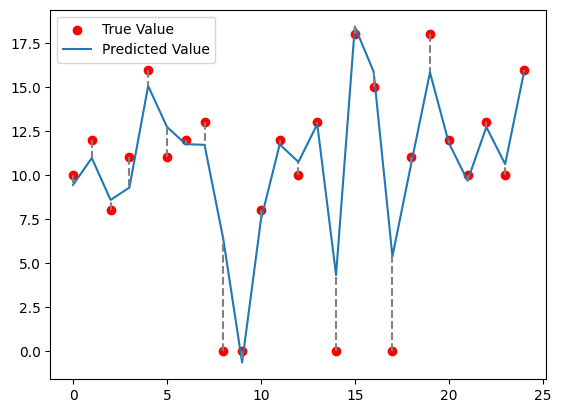

In [629]:
from sklearn.linear_model import Lasso # Linear Regression with L1

l1 =Lasso(random_state=42)
learn(l1, "l1") # L1 

Using L1 Regularization, the performance is actually worse, since some coefficients got squeezed lower which might cause unintended impact.

Training R2 Score: 0.816
Training MAE Score: 1.365


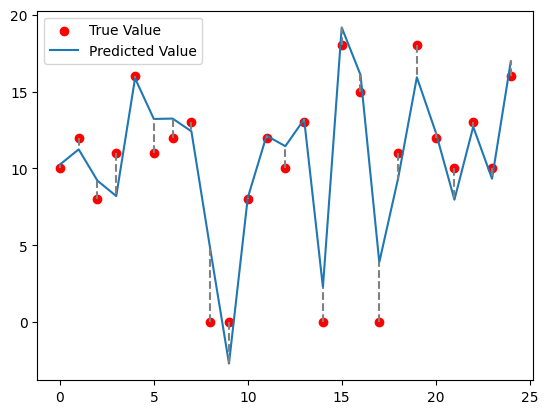

In [630]:
from sklearn.linear_model import Ridge

ridge = Ridge(random_state=42)
learn(ridge, "l2")

The same could said for L2 Regularization, but the impact is not as drastic as L1 regularization.

##### Scaling

Taking a look at the data.

In [631]:
print(X_train_encoded[0])

[ 1.  0.  1.  0.  0.  1.  1.  0.  0.  1.  0.  0.  1.  0.  0.  0.  0.  1.
  0.  0.  0.  0.  0.  1.  0.  1.  0.  0.  1.  0.  1.  1.  0.  0.  1.  0.
  1.  0.  1.  1.  0.  1.  0. 16.  3.  3.  3.  2.  0.  5.  3.  2.  1.  1.
  4.  4.  8. 10.]


Ignoring the categorical data being encoded as 0 or 1, the actual numerical data are on a different scale of 17 to 1. This might interfere with our model's performance. We can perform scaling to make all numerical data on the same scale. (Except the categorical encoded data)

In [632]:
pre.set_params(num_real=StandardScaler(with_mean=False))  # toggle on
X_train_encoded = pre.fit_transform(X_train)
X_test_encoded  = pre.transform(X_test)
print(X_train_encoded[0])

[ 1.          0.          1.          0.          0.          1.
  1.          0.          0.          1.          0.          0.
  1.          0.          0.          0.          0.          1.
  0.          0.          0.          0.          0.          1.
  0.          1.          0.          0.          1.          0.
  1.          1.          0.          0.          1.          0.
  1.          0.          1.          1.          0.          1.
  0.         12.42711668  2.8071829   2.8172556   4.4337707   2.3944841
  0.          5.82325136  2.94581722  1.77551632  1.12262853  0.76606693
  2.80674439  0.46039907  2.50723965  2.69175178]


Trying it on Linear Regression again.

Old Score:
* Training R2 Score: 0.738%
* Training MAE Score: 1.527

Training R2 Score: 0.814
Training MAE Score: 1.375


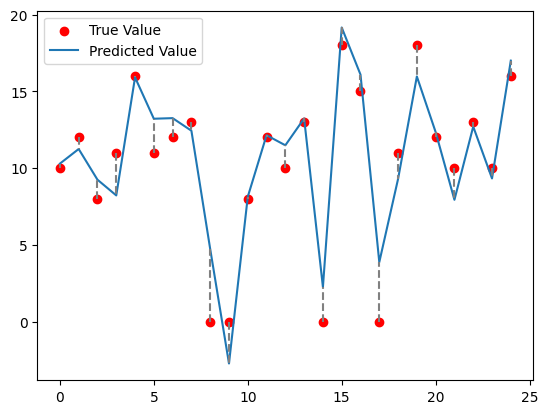

In [633]:
linear_scale = LinearRegression()
learn(linear_scale, "linear_regression_scaled")

A little improvement in terms of performance

In [634]:
# Linear Models performance
comparison

{'linear_regression': {'R2': 0.814, 'MAE': 1.381},
 'l1': {'R2': 0.824, 'MAE': 1.07},
 'l2': {'R2': 0.816, 'MAE': 1.365},
 'linear_regression_scaled': {'R2': 0.814, 'MAE': 1.375}}

#### Non-Linear Model: Support Vector Machine

Training R2 Score: 0.556
Training MAE Score: 1.941


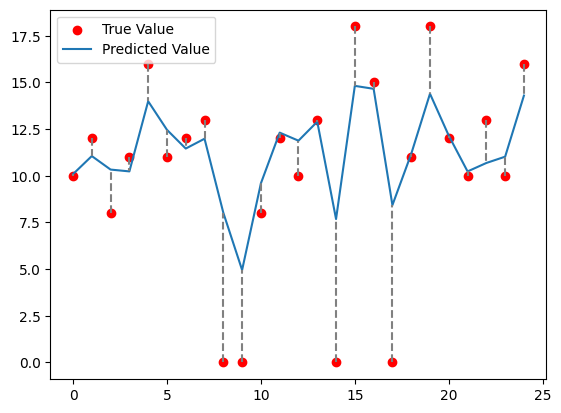

In [635]:
from sklearn.svm import SVR
svr = SVR()
learn(svr, "svr")

#### Non-Linear Model: Decision Tree

Training R2 Score: 0.726
Training MAE Score: 1.221


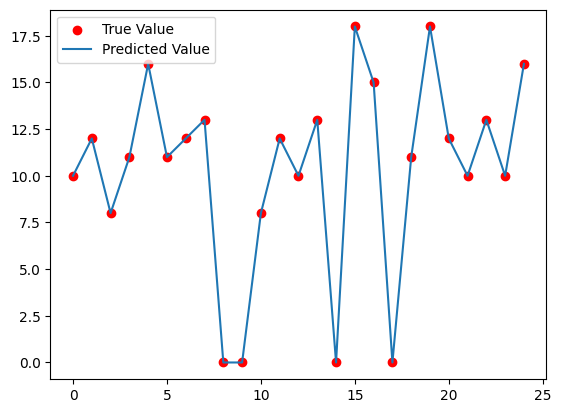

In [636]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(random_state=42)
learn(tree, "decision_tree")

#### Non-Linear Model: K-Nearest Neighbours

Training R2 Score: 0.608
Training MAE Score: 2.034


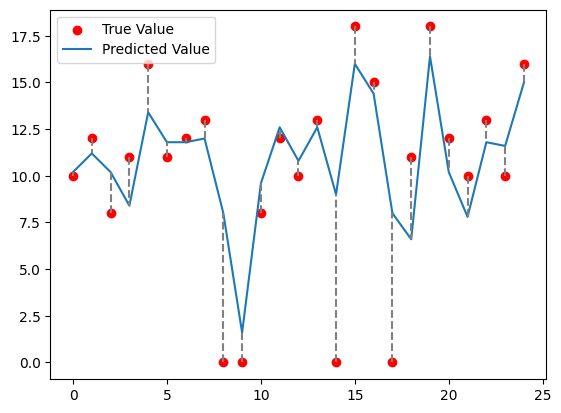

In [637]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()
learn(knn, 'knn')

#### Ensemble Model: Random Forest

Training R2 Score: 0.858
Training MAE Score: 0.999


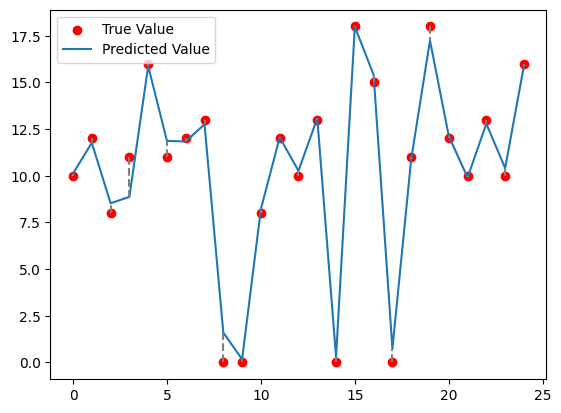

In [638]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(random_state=42)
learn(forest, 'randomForest')

#### Ensemble Model: Gradient Boosting

Training R2 Score: 0.874
Training MAE Score: 1.014


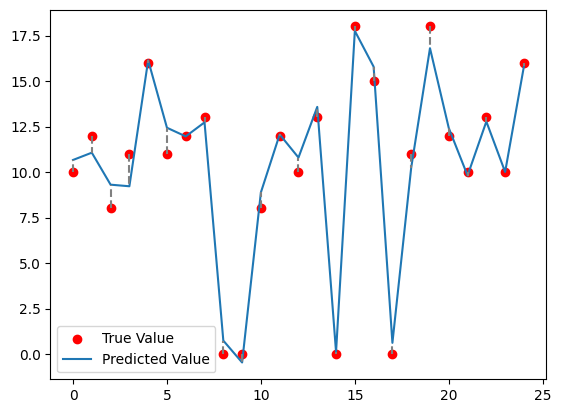

In [639]:
from sklearn.ensemble import GradientBoostingRegressor

boosting = GradientBoostingRegressor(random_state=42)
learn(boosting, 'gradient_boosting')

#### Recap:

So far, we've tried 8 different machine learning models:

* Linear Regression
* Linear Regression with L1 Regularization
* Linear Regression with L2 Regularization
* Linear Regression (After Scaling)
* Support Vector Machine
* Decision Tree
* K-Nearest Neighbours
* Random Forest
* Gradient Boosting Regressor

All of the models had varying degrees of R2 and MAE metrics as shown:

In [640]:
comparison

{'linear_regression': {'R2': 0.814, 'MAE': 1.381},
 'l1': {'R2': 0.824, 'MAE': 1.07},
 'l2': {'R2': 0.816, 'MAE': 1.365},
 'linear_regression_scaled': {'R2': 0.814, 'MAE': 1.375},
 'svr': {'R2': 0.556, 'MAE': 1.941},
 'decision_tree': {'R2': 0.726, 'MAE': 1.221},
 'knn': {'R2': 0.608, 'MAE': 2.034},
 'randomForest': {'R2': 0.858, 'MAE': 0.999},
 'gradient_boosting': {'R2': 0.874, 'MAE': 1.014}}

In [641]:
# Finding the one with the least of both
# Least R2
# https://www.w3schools.com/python/gloss_python_loop_dictionary_items.asp
# Best R2 (higher is better)
best_r2 = max(comparison.items(), key=lambda x: x[1]['R2'])
print(f"Best R2: {best_r2[0]} -> R2 = {best_r2[1]['R2']}, MAE = {best_r2[1]['MAE']}")

# Best MAE (lower is better)
best_mae = min(comparison.items(), key=lambda x: x[1]['MAE'])
print(f"Best MAE: {best_mae[0]} -> R2 = {best_mae[1]['R2']}, MAE = {best_mae[1]['MAE']}")

model = forest


Best R2: gradient_boosting -> R2 = 0.874, MAE = 1.014
Best MAE: randomForest -> R2 = 0.858, MAE = 0.999


For our project, we value **accuracy** more than other metrices. Hence, we picked `RandomForest()` for its MAE.

Very high amount of R2 (Almost 1) we should suspect Overfitting in general.

We can now use two of the methods for tuning a model's performance on our chosen model:

1. Feature Selection
2. Hyperparameter Tuning

#### Feature Selection

Some features, despite being in the same dataset, are not as important as the others, and might actually be detrimental to the model's learning instead of helping it. In **linear models**, this can easily be visualized and explained through the coefficients of each feature, unlike SVM.

The following example shows feature selection in a linear model. A similar process will then be applied to the chosen SVM model.

Training data has R2 of: 0.8140160634256369


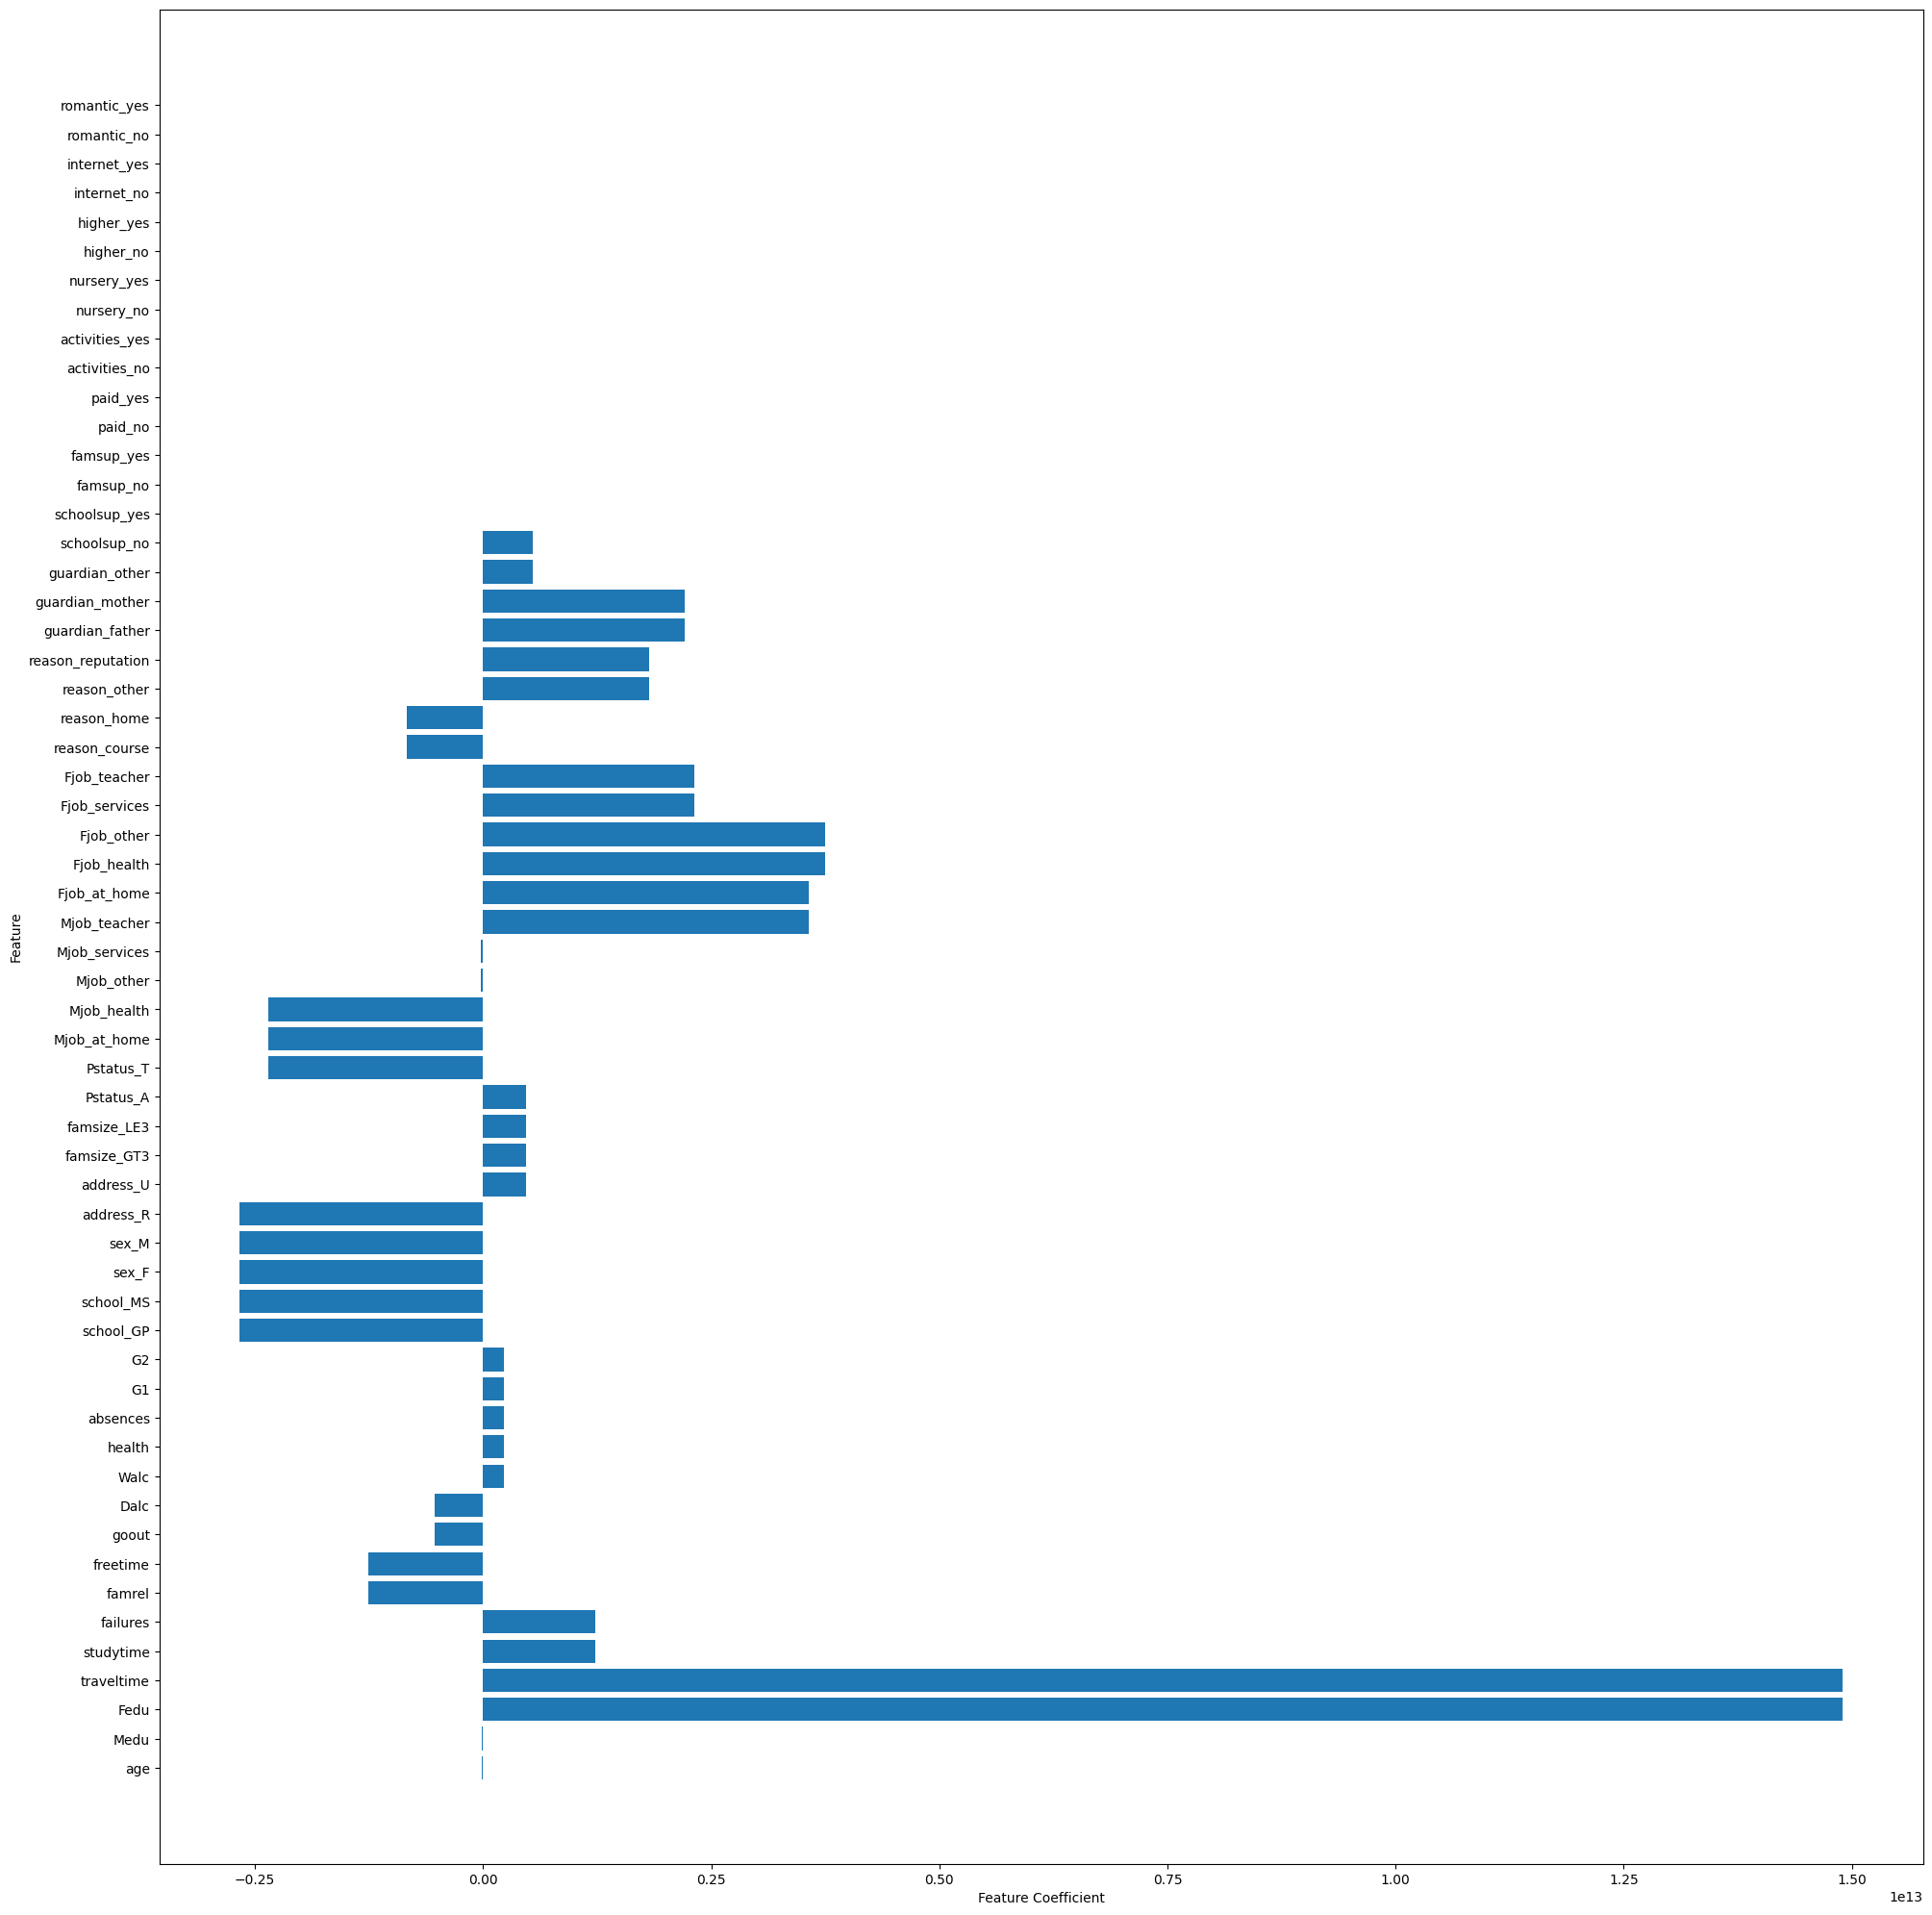

In [642]:
# Example in Linear model
clf = LinearRegression()
clf.fit(X_train_encoded, y_train)
print(f"Training data has R2 of: {(cross_val_score(clf, X_train_encoded, y_train, cv=6).mean())}")

# Plotting
df_dummy = pd.get_dummies(df.iloc[:,0:-1])
plt.figure(figsize=(20,20))
plt.barh(range(X_train_encoded.shape[1]), clf.coef_)
plt.yticks(np.arange(X_train_encoded.shape[1]), df_dummy.columns.values)
plt.tight_layout()
plt.ylabel("Feature")
plt.xlabel("Feature Coefficient")
plt.show()

We can see that some features have coefficients that are almost zero. We can drop these features and retrain the model for better performance.

In [643]:
from sklearn.feature_selection import SelectPercentile, f_regression

selector = SelectPercentile(f_regression, percentile=25) # Keep 25% of the features
X_train_encoded_selected = selector.fit_transform(X_train_encoded, y_train)
print(f"Before feature selection: {X_train_encoded.shape}")
print(f"After feature selection: {X_train_encoded_selected.shape}")

Before feature selection: (276, 58)
After feature selection: (276, 15)


In [644]:
clf.fit(X_train_encoded_selected, y_train)
print(f"Training data has R2: {(cross_val_score(clf, X_train_encoded_selected, y_train, cv=6).mean())}")

Training data has R2: 0.8193014435921122


An increase in performance can be seen (~0.814 to ~0.819).

In [645]:
# Applying the same thing to the forest model
print(f"Pre Feature Selection data has R2 {(cross_val_score(model, X_train_encoded, y_train, cv=6).mean())}")

selector = SelectPercentile(f_regression, percentile=50) 
X_train_encoded_selected = selector.fit_transform(X_train_encoded, y_train)
model.fit(X_train_encoded_selected, y_train)

print(f"Post Feature Selection data has R2 {(cross_val_score(model, X_train_encoded_selected, y_train, cv=6).mean())}")

Pre Feature Selection data has R2 0.857748664571325
Post Feature Selection data has R2 0.85790480373094


In our case, dropping 50% of the features has a miniscule amount of improvement.

In [646]:
# Applying the same thing to the forest model
print(f"Pre Feature Selection data has R2 {(cross_val_score(model, X_train_encoded, y_train, cv=6).mean())}")

selector = SelectPercentile(f_regression, percentile=75) 
X_train_encoded_selected = selector.fit_transform(X_train_encoded, y_train)
model.fit(X_train_encoded_selected, y_train)

print(f"Post Feature Selection data has R2 {(cross_val_score(model, X_train_encoded_selected, y_train, cv=6).mean())}")

Pre Feature Selection data has R2 0.857748664571325
Post Feature Selection data has R2 0.8574584011384564


The changes are barely noticable for better or for worse. We can try dropping features again and again or move on to the other technique.

#### Hyperparameter Tuning

A machine learning model comes with a set of parameters the user can modified (called hyperparameters).
Tuning these values can help with improving a model's performance

In [647]:
# List of SVM parameters
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

Any combination of these parameters can be changed.

Training R2 Score: 0.841
Training MAE Score: 1.048


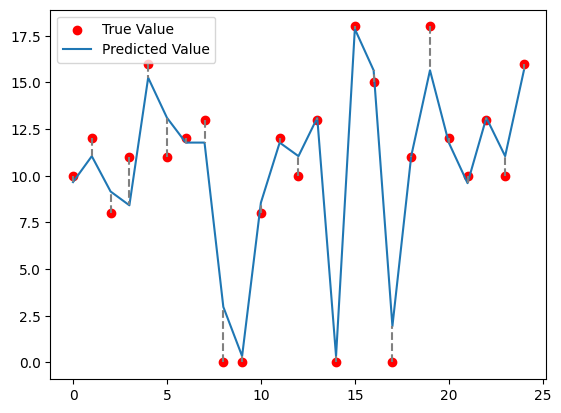

In [648]:
max_depth = 3
learn(RandomForestRegressor(max_depth=max_depth, random_state=42), name='demo0')

##### Using Grid Search to Perform Tuning

An automated hyperparameter tuning technique in machine learning that systematically explores all possible combinations of specified hyperparameter values to find the best-performing model

In [664]:
from sklearn.model_selection import GridSearchCV

print(f"R2 before Grid Search: {(cross_val_score(model, X_train_encoded, y_train).mean())}")
# Specify the values to be used
model = RandomForestRegressor(random_state=42)
param_grid = {
    "max_depth": [2, 3, 4, 5, 6, 7],
    'n_estimators': [10, 20, 30, 40, 50, 100, 150, 200, 300],
}

# https://stackoverflow.com/questions/53973563/using-multiple-metric-evaluation-with-gridsearchcv
grid = GridSearchCV(estimator=model, param_grid=param_grid,scoring='r2')
grid.fit(X_train_encoded, y_train)
# Since grid search perform CV, we can call `score` directly
print(f"\nR2 after Grid Search: {(grid.best_score_)}")

R2 before Grid Search: 0.8925130779815247

R2 after Grid Search: 0.8951445164434462


Barely any increase in R<sup>2</sup> score. More parameters grid can also be used for more coverage. Looking at RandomForestRegressor() documentation, we could see the parameters that could be set.

In [665]:
# Find the best parameters 
print(grid.best_params_)

{'max_depth': 6, 'n_estimators': 20}


In [666]:
# Final testing of the data
print(f"Final Testing: {grid.score(X_test_encoded, y_test)}")

Final Testing: 0.8304836893734697


#### Pipelining
 
The previous codes are a bit messy with various variables. For simplicity, we are going to wrap everythinginto a pipeline. 

Starting from the splitting, encoding, and model testing.

In [667]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [676]:
from sklearn.model_selection import KFold

X = df.iloc[:, 0:-1]
y = df.iloc[:, -1]

cv = KFold(n_splits=6, shuffle=True, random_state=42)

# The X_test and y_test would never be touched at all until the end
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=42)

In [679]:
from sklearn.pipeline import Pipeline

pre = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols_raw),
        ("num_real", StandardScaler(with_mean=False), num_real),   
        ("num_bin", "passthrough", num_binary),
    ],
    remainder="drop",
    verbose_feature_names_out=True
)

pipe = Pipeline([
    ('transformer', pre), # Encode X columns
    ('model', RandomForestRegressor(random_state=42)) # The Classifier
])

param_grid = {
    "model__max_depth": [2, 3, 4, 5, 6, 7],
    'model__n_estimators': [10, 20, 30, 40, 50, 100, 150, 200, 300],
}
pipe.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['school', 'sex', 'address',
                                                   'famsize', 'Pstatus', 'Mjob',
                                                   'Fjob', 'reason', 'guardian',
                                                   'schoolsup', 'famsup',
                                                   'paid', 'activities',
                                                   'nursery', 'higher',
                                                   'internet', 'romantic']),
                                                 ('num_real',
                                                  StandardScaler(with_mean=False),
                                                  ['age', 'Medu', 'Fedu',
                                                   'traveltime', 'studytime',
                                                   'failures', 'famrel',
                                                   'freetime', 'goout', 'Dalc',
                                                   'Walc', 'health', 'absences',
                                                   'G1', 'G2']),
                                                 ('num_bin', 'passthrough',
                                                  [])])),
                ('model', RandomForestRegressor(random_state=42))])

In [680]:
print(f"Base Score: {((cross_val_score(pipe, X_train, y_train, cv=cv).mean())).round(3)}")

Base Score: 0.874


In [681]:
grid = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
)

grid.fit(X_train, y_train)
print(f"GridSearch Parameters: {grid.best_params_}")
print(f"GridSearch Score: {grid.best_score_}")

GridSearch Parameters: {'model__max_depth': 6, 'model__n_estimators': 20}
GridSearch Score: 0.8955668161820327


In [683]:
from sklearn.metrics import mean_absolute_error

print(f"Final Test R2: {grid.best_estimator_.score(X_test, y_test)}")
print(f"Final Test MAE: {mean_absolute_error(y_test, grid.best_estimator_.predict(X_test))}")

Final Test R2: 0.8304836893734697
Final Test MAE: 1.1316821233845653


### Extra: Classification

Instead of predicting a number itself, we can **bin** the G3 score into grade (bin) of equal sizes and predict what classes the output will belong to.

In [684]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [ ]:
def gradingBin(score):
    if score < 5:
        return 'F'
    elif score >= 5 and score < 10:
        return 'C'
    elif score >= 10 and score < 15:
        return "B"
    else:
        return 'A'

df['Grade'] = df['G3'].apply(gradingBin) # 0 to 20 => 4 grade
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Grade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,C
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,C
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,B
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,A
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,4,4,5,4,11,9,9,9,C
391,MS,M,17,U,LE3,T,3,1,services,services,...,4,5,3,4,2,3,14,16,16,A
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,3,3,3,3,3,10,8,7,C
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,1,3,4,5,0,11,12,10,B


In [690]:
from sklearn.model_selection import StratifiedKFold

X = df.iloc[:, 0:-2] # Don't want raw G3 this time
y = df.iloc[:, -1]

cv = StratifiedKFold(n_splits=6, shuffle=True, random_state=42)

# The X_test and y_test would never be touched at all until the end
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=42, stratify=y)

In [692]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

pre = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols_raw),
        ("num_real", StandardScaler(with_mean=False), num_real),   
        ("num_bin", "passthrough", num_binary),
    ],
    remainder="drop",
    verbose_feature_names_out=True
)

pipe = Pipeline([
    ('transformer', pre), # Encode X columns
    ('model', RandomForestClassifier(random_state=42)) # The Classifier
])

param_grid = {
    "model__max_depth": [2, 3, 4, 5, 6, 7],
    'model__n_estimators': [10, 20, 30, 40, 50, 100, 150, 200, 300],
}
pipe.fit(X_train, y_train)
print(f"Base Accuracy: {((cross_val_score(pipe, X_train, y_train, cv=cv).mean())).round(3)*100}%")


Base Accuracy: 81.89999999999999%


In [693]:
grid = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
)

grid.fit(X_train, y_train)
print(f"GridSearch Parameters: {grid.best_params_}")
print(f"GridSearch Score: {grid.best_score_}")

GridSearch Parameters: {'model__max_depth': 7, 'model__n_estimators': 30}
GridSearch Score: 0.8190259740259741


In [695]:
print(f"Final Test Accuracy: {grid.best_estimator_.score(X_test, y_test)}%")

Final Test Accuracy: 0.8235294117647058%


## Summary and Closing Thought:

With metrics being something more abstracts than `accuracy` for classification, interpretation of the model can be somewhat complicated. But with the R-squared score being ~0.8 in both training and final testing data, and mean absolute error of 1.1 (being 1.1 away from the actual G3 score on average), the model performs relatively well.

My opinion on the project is that data handling, data cleaning, and data processing are pretty much more important than the steps of fitting and grid searching a machine learning model. I spent way more times on transforming the raw data into actual numerical data for the model.

## References:

1. O'Reily Introduction to Machine Learning with Python: A Guide for Data Scientists.
2. Cortez, P. (2008). Student Performance [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C5TG7T.